Here we have the franke function

In [3]:

# imports
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
import numpy as np
from random import random, seed
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

C:\Users\Ericr\AppData\Local\Temp\ipykernel_17268\2448197282.py:2: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = fig.gca(projection='3d')


ValueError: Argument Z must be 2-dimensional.

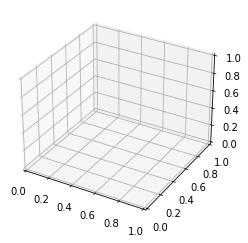

In [13]:
fig = plt.figure()
ax = fig.gca(projection='3d')
# Make data.
x = np.arange(0, 1, 0.05)
y = np.arange(0, 1, 0.05)
xv, yv = np.meshgrid(x,y)

def FrankeFunction(x,y):
    term1 = 0.75*np.exp(-(0.25*(9*x-2)**2) - 0.25*((9*y-2)**2))
    term2 = 0.75*np.exp(-((9*x+1)**2)/49.0 - 0.1*(9*y+1))
    term3 = 0.5*np.exp(-(9*x-7)**2/4.0 - 0.25*((9*y-3)**2))
    term4 = -0.2*np.exp(-(9*x-4)**2 - (9*y-7)**2)
    return term1 + term2 + term3 + term4

z = FrankeFunction(x, y)
# Plot the surface.
surf = ax.plot_surface(xv, yv, z, cmap=cm.coolwarm, linewidth=0, antialiased=False)
# Customize the z axis.
ax.set_zlim(-0.10, 1.40)
ax.zaxis.set_major_locator(LinearLocator(10))
ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))
# Add a color bar which maps values to colors.
fig.colorbar(surf, shrink=0.5, aspect=5)
plt.show()

In [5]:
def create_X(x, y, n ):
    if len(x.shape) > 1:
        x = np.ravel(x)
        y = np.ravel(y)

    N = len(x)
    l = int((n+1)*(n+2)/2)		# Number of elements in beta
    X = np.ones((N,l))

    for i in range(1,n+1):
        q = int((i)*(i+1)/2)
        for k in range(i+1):
            X[:,q+k] = (x**(i-k))*(y**k)

    return X

In [6]:
def R2(y_data, y_model):
    return 1 - np.sum((y_data - y_model) ** 2) / np.sum((y_data - np.mean(y_data)) ** 2)
def MSE(y_data,y_model):
    n = np.size(y_model)
    return np.sum((y_data-y_model)**2)/n

Training data; MSE: [0.18346908 0.03886823 0.03783538 0.01002419 0.00455888], R2: [0.         0.76259812 0.79011419 0.93045637 0.97408136]
Training data; MSE: [0.11379187 0.01106997 0.01933798 0.02577711 0.00636798], R2: [-0.39380005 -1.39374416  0.82674331  0.87979162  0.95098268]


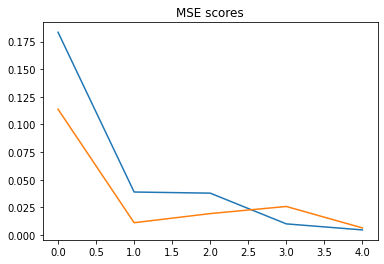

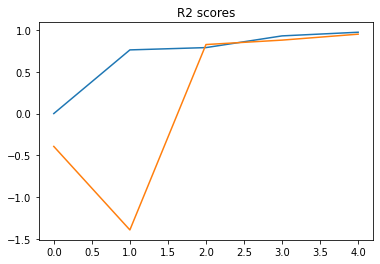

In [18]:
MSE_arr_train = np.zeros((5))
MSE_arr_test = np.zeros((5))
R2_arr_train = np.zeros((5))
R2_arr_test = np.zeros((5))

for n in range(5):
    X = create_X(x, y, n)

    X_train, X_test, z_train, z_test = train_test_split(X, z, test_size=0.2)

    beta = np.linalg.pinv(X_train.T @ X_train) @ X_train.T @ z_train
    z_model = X_train @ beta
    z_model_test = X_test @ beta
    MSE_arr_train[n] = MSE(z_train, z_model)
    MSE_arr_test[n] = MSE(z_test, z_model_test)
    R2_arr_train[n] = R2(z_train, z_model)
    R2_arr_test[n] = R2(z_test, z_model_test)
print(f"Training data; MSE: {MSE_arr_train}, R2: {R2_arr_train}")
print(f"Training data; MSE: {MSE_arr_test}, R2: {R2_arr_test}")
plt.plot(MSE_arr_train)
plt.plot(MSE_arr_test)
plt.title("MSE scores")
plt.show()
plt.plot(R2_arr_train)
plt.plot(R2_arr_test)
plt.title("R2 scores")
plt.show()

In [ ]:


plt.plot(X_train @ beta)
plt.scatter(range(80), z_train)
plt.show()

y_model = X_test @ beta

MSE_test = MSE(z_test, y_model)
R2_test = R2(z_test, y_model)
print(f"Test data; MSE: {MSE_test}, R2: {R2_test}")
plt.plot(X_test @ beta)
plt.scatter(range(20), z_test)
plt.show()

In [ ]:
scikit_linreg = LinearRegression(fit_intercept=False).fit(X_train, z_train)
scikit_model = scikit_linreg.predict(X_train) 
MSE_train = MSE(z_train, scikit_model)
R2_train = R2(z_train, scikit_model)
print(f"Training data; MSE: {MSE_train}, R2: {R2_train}")

plt.plot(scikit_model)
plt.scatter(range(80), z_train)
plt.show()

MSE_test = MSE(z_test, scikit_model)
R2_test = R2(z_test, scikit_model)
print(f"Test data; MSE: {MSE_test}, R2: {R2_test}")

plt.plot(scikit_model)
plt.scatter(range(20), z_test)
plt.show()